#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
## Ignore warnings

import warnings
warnings.filterwarnings("ignore")

#### Reading and understanding Data

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#check the dataset dimensions
df.shape

(1460, 81)

In [7]:
#Check Column details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## inspecting the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Data Cleaning and Manipulations

In [9]:
##dropping the duplicate records from dataset
df = df.drop_duplicates()

In [10]:
df.shape

(1460, 81)


- Since the shape of dataset remians same before and after dropping dupplicates, we conclude that there are no duplicate rows present in the given dataset

In [11]:
##Checking for null values
df.isnull().sum().head(60)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

- By inspecting few features above seems like some columns in given dataset consists of null values, lets inspect them by null value percentage

In [12]:
## missing value percentage
missing_val_percent = round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending = False)
missing_null_percent = pd.DataFrame(missing_val_percent[missing_val_percent > 0],columns=["Null %"])
missing_null_percent.index.name = 'Features'
print("Percentage of missing values in each Feature in given dataset as follows:")
print(missing_null_percent)

Percentage of missing values in each Feature in given dataset as follows:
              Null %
Features            
PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07


- 19 features have missing values, out of these 5 features have more than 45% missing values.

- Based on above observation since first five features have more that 45% missing values, we will not try to fill the missing values for the features, instead we will drop them.Also we will remove id column

In [13]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],axis=1)
df.shape

(1460, 75)

- In order to impue null values, we first segregate the numerical and categorical features

In [14]:
numeric_col = []
categorical_col = []
for i in df.columns:
    if df[i].dtypes !='O':
        numeric_col.append(i)
    else:
        categorical_col.append(i)
print("Number of numerical features in the dataset is: ",len(numeric_col))
print("Number of categorical features in the dataset is: ",len(categorical_col))

Number of numerical features in the dataset is:  37
Number of categorical features in the dataset is:  38


In [15]:
#Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Considerations:
- For numeric columns we will fill missing values with median.
- For categorical columns we will fill missing values with mode.

In [17]:
# impute null values with median for numeric columns
df['GarageYrBlt']  = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['LotFrontage']  = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']  = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

# impute null values with mode for categorical columns
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','Electrical'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
## missing value percentage
missing_val_percent = round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending = False)
missing_null_percent = pd.DataFrame(missing_val_percent[missing_val_percent > 0],columns=["Null %"])
missing_null_percent.index.name = 'Features'
print("Percentage of missing values in each Feature in given dataset as follows:")
print(missing_null_percent)

Percentage of missing values in each Feature in given dataset as follows:
Empty DataFrame
Columns: [Null %]
Index: []


- From above result it implies that null values or missing values is not present in dataset

#### Data Imbalance

In [19]:
def get_col_imbalance(data, prcnt):
    data_copy = data.copy()
    col_list = []
    categorical_col_list = data_copy.select_dtypes(include=['object'])
    for col in categorical_col_list:
        if(data_copy[col].value_counts().max() > int(prcnt*len(data_copy.index)/100)):
            col_list.append(col)
    return col_list

remove_columns = get_col_imbalance(data=df,prcnt=90)   #90 percent of a relies on single same value
print("Faetures removed(categorical) : ",remove_columns)
print("\nNumber of categorical features removed: ",len(remove_columns))

Faetures removed(categorical) :  ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']

Number of categorical features removed:  13


In [20]:
#Dropping above categorical variables
df = df.drop(remove_columns,axis = 1)
df.shape

(1460, 62)

In [21]:
def get_col_imbalance(data, prcnt):
    data_copy = data.copy()
    col_list = []
    numeric_col_list = data_copy.select_dtypes(exclude=['object'])
    for col in numeric_col_list:
        if(data_copy[col].value_counts().max() > int(prcnt*len(data_copy.index)/100)):
            col_list.append(col)
    return col_list

remove_columns = get_col_imbalance(data=df,prcnt=90)
print("Faetures to be removed(Numeric) : ",remove_columns)
print("\nNumber of Numeric features removed: ",len(remove_columns))

Faetures to be removed(Numeric) :  ['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

Number of Numeric features removed:  7


In [22]:
df = df.drop(remove_columns,axis = 1)
df.shape

(1460, 55)

#### Derived Features

In [23]:
# New feature HouseRemodlled - This detrmines the house was remodlled or not
def checkfor_remodell(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2

df['RemodelledHouse'] = df.apply(checkfor_remodell,axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodelledHouse
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,548,0,61,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,460,298,0,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,608,0,42,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,642,0,35,272,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,836,192,84,0,12,2008,WD,Normal,250000,0


In [24]:
df.RemodelledHouse.value_counts()

0    764
1    696
Name: RemodelledHouse, dtype: int64

- In above result set, no row has an entry of 2 in RemodelledHouse feature, hence no wrong entires was added to newly created feature

In [25]:
## Add another feature called propertyAge derived from the year features in the dataset

def get_property_age(row):
    return row['YrSold'] - row['YearBuilt']

df['PropertyAge'] = df.apply(get_property_age,axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodelledHouse,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,61,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,298,0,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,42,0,9,2008,WD,Normal,223500,1,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,35,272,2,2006,WD,Abnorml,140000,1,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,192,84,0,12,2008,WD,Normal,250000,0,8


In [26]:
df.PropertyAge.value_counts()

1      100
0       64
4       41
2       39
3       36
      ... 
115      1
122      1
128      1
114      1
125      1
Name: PropertyAge, Length: 122, dtype: int64

- No negative value feature propertyAge, hence the feature created will be a valid.

- Dropping columns with Year related features, since two columns was derived form them, these year features are no longer needed for analysis

In [27]:
##Dropping features: 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

df = df.drop(['YrSold','GarageYrBlt','YearRemodAdd','YearBuilt'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition,SalePrice,RemodelledHouse,PropertyAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,548,0,61,0,2,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,460,298,0,0,5,WD,Normal,181500,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,608,0,42,0,9,WD,Normal,223500,1,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,642,0,35,272,2,WD,Abnorml,140000,1,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,836,192,84,0,12,WD,Normal,250000,0,8


In [28]:
df.shape

(1460, 53)

In [29]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'RemodelledHouse', 'PropertyAge'],
      dtype='object')

#### Outlier Treatment

In [30]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,RemodelledHouse,PropertyAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,...,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,180921.195890,0.476712,36.547945
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,...,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,79442.502883,0.499629,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000
10%,20.000000,49.000000,5000.000000,5.000000,5.000000,0.000000,0.000000,0.000000,74.900000,636.900000,...,0.000000,1.000000,240.000000,0.000000,0.000000,0.000000,3.000000,106475.000000,0.000000,1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,129975.000000,0.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,163000.000000,0.000000,35.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,214000.000000,1.000000,54.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,326100.000000,1.000000,91.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,12.000000,442567.010000,1.000000,110.410000


In [31]:
df.shape

(1460, 53)

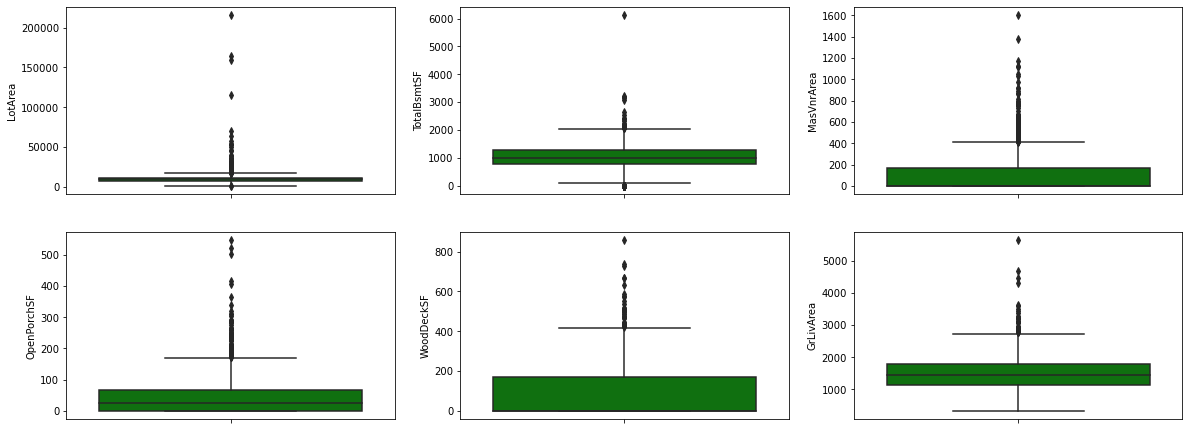

In [32]:
## Visualizing outliers in numeric columns
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
sns.boxplot(y='LotArea', color='g', data=df)
plt.subplot(5,3,2)
sns.boxplot(y='TotalBsmtSF', color='g', data=df)
plt.subplot(5,3,3)
sns.boxplot(y='MasVnrArea', color='g', data=df)
plt.subplot(5,3,4)
sns.boxplot(y='OpenPorchSF', color='g', data=df)
plt.subplot(5,3,5)
sns.boxplot(y='WoodDeckSF', color='g', data=df)
plt.subplot(5,3,6)
sns.boxplot(y='GrLivArea', color='g', data=df)

plt.show()

In [33]:
# Get total record count in a Variable

totCount = df.shape[0]
df.shape

(1460, 53)

In [34]:
## Removing the outliers 

out_LotArea = df['LotArea'].quantile(0.99)
df = df[df['LotArea'] < out_LotArea ]

out_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df['TotalBsmtSF'] < out_TotalBsmtSF ]

out_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df['WoodDeckSF'] < out_WoodDeckSF ]

out_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df['OpenPorchSF'] < out_OpenPorchSF ]


In [35]:
# Percentage of data in dataset after outlier removal

prcnt_data = round(100*(len(df)/totCount),2)
print("Percentage of data in dataset after outlier removal is : ", prcnt_data,"%")

Percentage of data in dataset after outlier removal is :  95.89 %


- Even after removal  of outliers in numeric columns we managed to retain almost 96% of data from the given original dataset. Hence outlier removal doesnot affect our predicitons

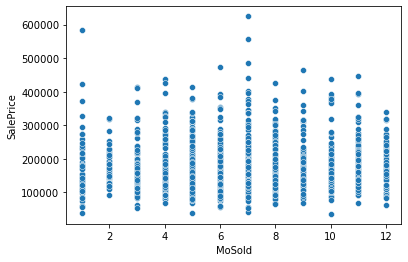

In [36]:
sns.scatterplot(x='MoSold', y='SalePrice', data=df)
plt.show()

- As MoSold feature does not contribute much to SalePrice Feature we can drop this feature

In [37]:
#dropping 'MoSold' in df
df = df.drop(['MoSold'],axis = 1)

#### Visualization

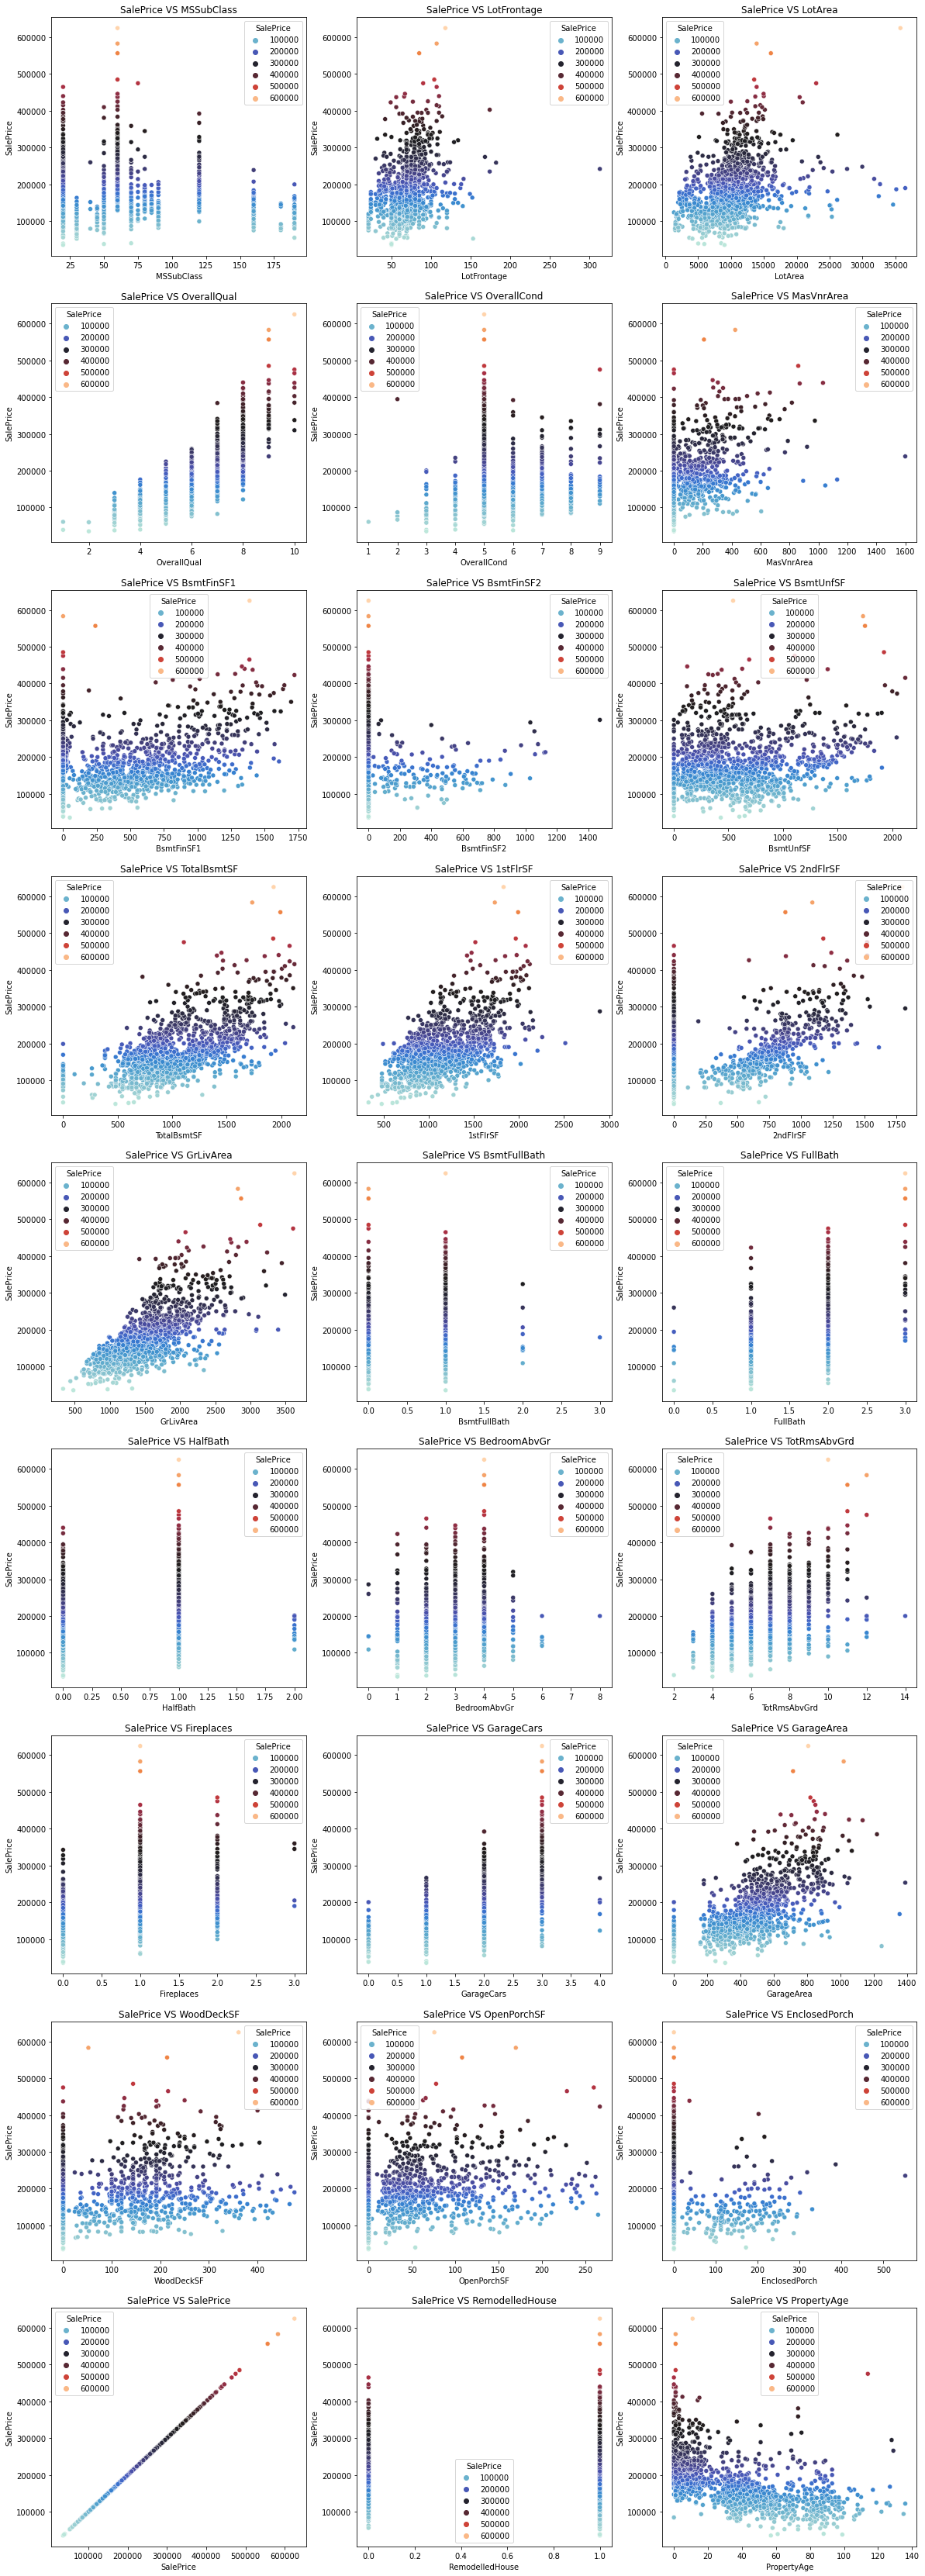

In [38]:
## Visualising Numerical feature with SalePrice
num_col = df.select_dtypes(exclude=['object'])
fig,axs = plt.subplots(9,3,figsize =(20,60))
for i,ax in zip(num_col.columns,axs.flatten()):
    sns.scatterplot(x=i,y='SalePrice',hue='SalePrice',data=num_col,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=10)
    plt.ylabel('SalePrice',fontsize=10)
    ax.set_title('SalePrice' + ' VS ' + str(i))

#### Observations:
 - As propertyAge increase the saleprice decrease, hence we conclude that new properties are costlier than older ones.
 - Total basement area is directly proportional to price of the property.
 - GRLiving Area has a direct correlation with price of the property.

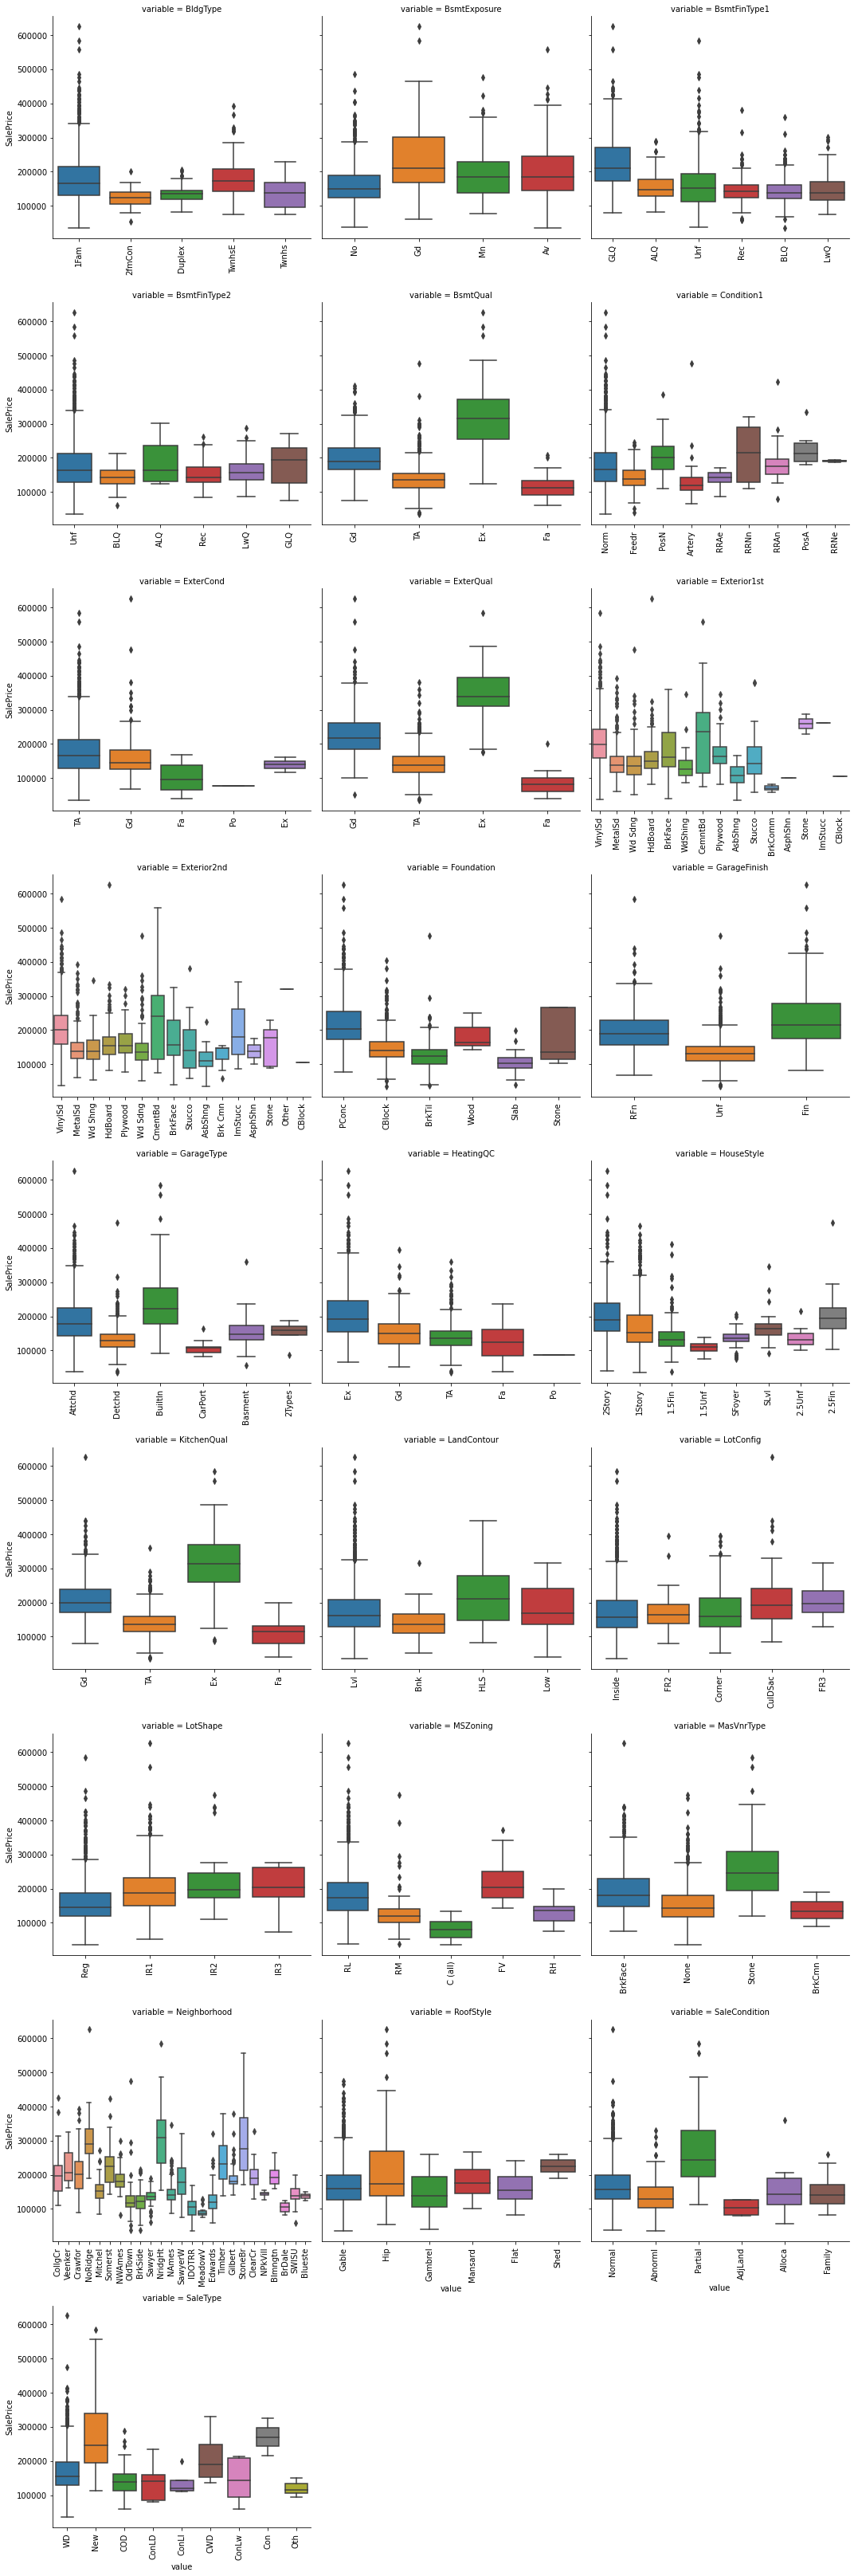

In [39]:
#Visualising categorical feature with SalePrice

def get_boxplot(x,y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

cat_col = df.select_dtypes(include =['object'])
facetsval = pd.melt(df, id_vars=['SalePrice'],value_vars=sorted(df[cat_col.columns]))
getgrid = sns.FacetGrid(facetsval, col="variable", col_wrap=3, sharex=False, size=5)
getgrid = getgrid.map(get_boxplot, "value", "SalePrice")

#### Observations

- Houses with good & excellent basement quality are sold at higher prices compared to others.
- Houses with good & excellent garages are sold at higher price.
- Houses with builtin qulaity kitchen also impacts saleprice in positive way.

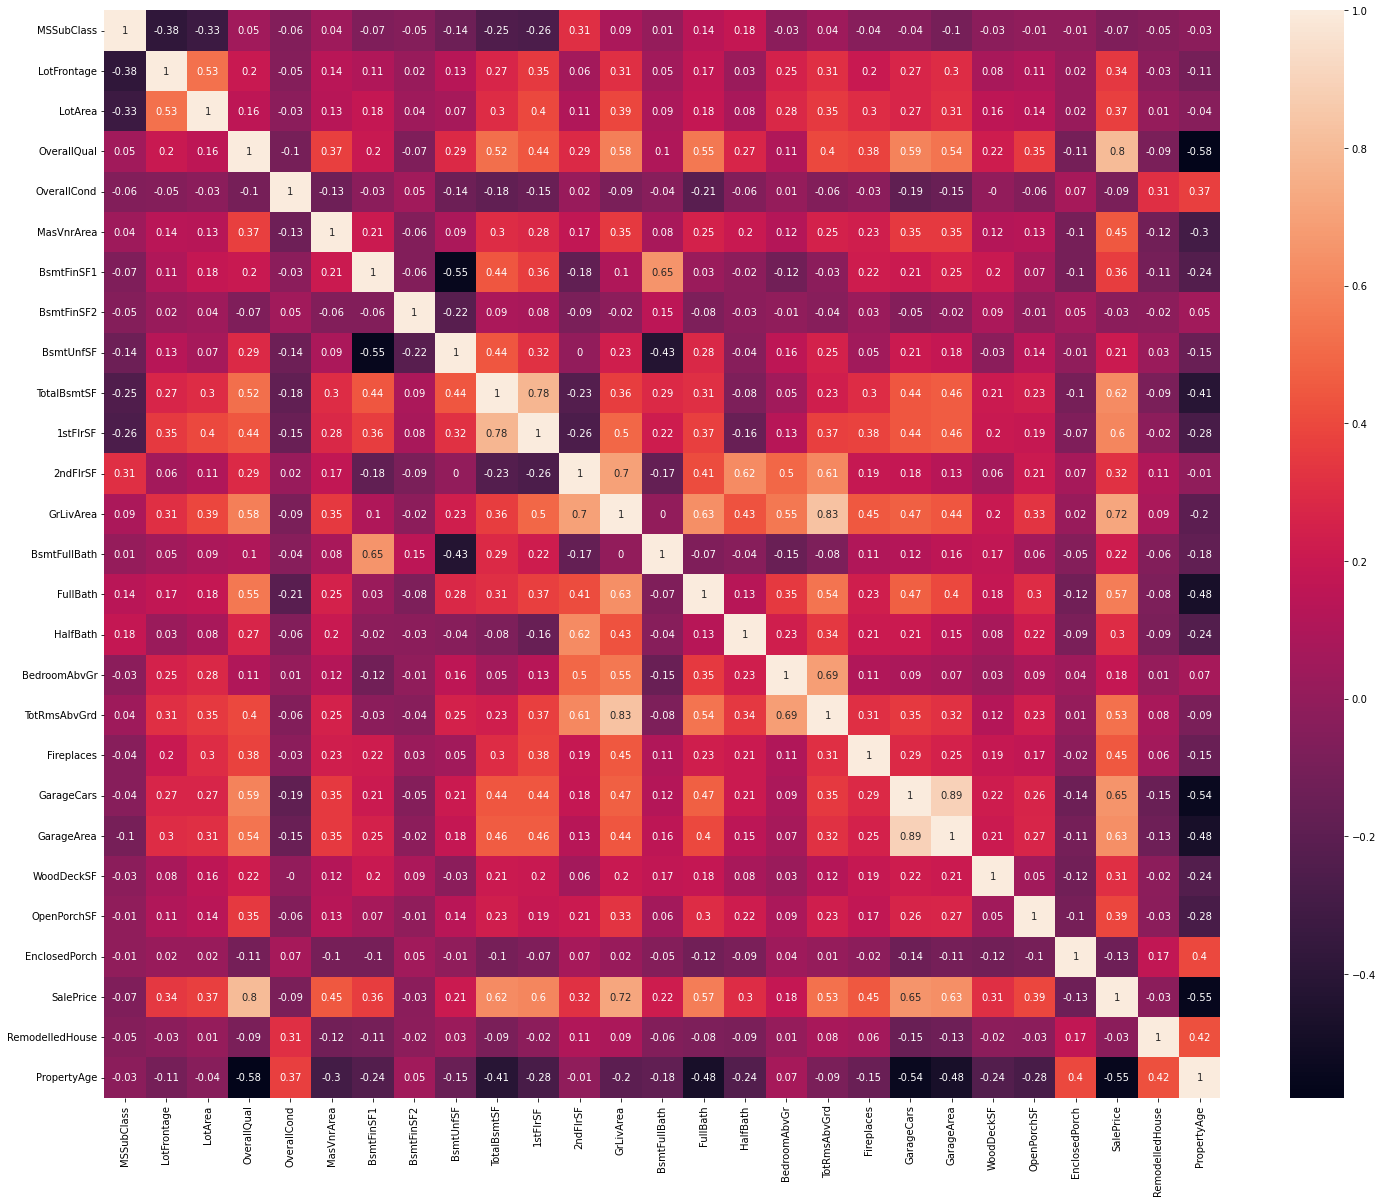

In [40]:
#checking for correlations between features
plt.subplots(figsize=(25,20))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

#### Observations
- Features 'GrLivArea' and 'TotRmsAbvGrd' shows(0.83) strong positive correlation. Hence dropping 'TotRmsAbvGrd'
- Features 'GarageCars' and 'GarageArea' shows(0.89) strong positive correlation. Hence dropping 'Garagecars'
- Features '1stFlrSF' and 'TotalBsmtSF' shows(0.78) strong positive correlation. Hence dropping '1stFlrSF'
- Features 'GrLivArea' and '2ndFlrSF' shows(0.7) strong positive correlation. Hence dropping '2ndFlrSF'

In [41]:
## To reduce multicollinearity we will remove highly correlated features.
df = df.drop(['TotRmsAbvGrd','GarageCars','1stFlrSF','2ndFlrSF'],axis = 1)
df.shape

(1400, 48)

 #### Dummy Variable

In [42]:
df = pd.get_dummies(df,drop_first=True)
df.shape

(1400, 172)

### Splitting data into train and test sets

In [43]:
df_train, df_test = train_test_split(df,train_size = 0.7, test_size=0.3, random_state =100)

#### Scaling Numeric Features

In [44]:
all_cols = df_train.columns

In [45]:
df_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SalePrice', 'RemodelledHouse', 'PropertyAge'],
      dtype='object')

In [46]:
scaler = StandardScaler()

In [47]:
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
df_test[all_cols] = scaler.transform(df_test[all_cols])

In [48]:
print(df_train.shape)
print(df_test.shape)

(979, 172)
(420, 172)


In [49]:
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [50]:
X_train  =df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [53]:
# R2 scores:
r2_train = r2_score(y_train, y_pred_train)
print("R2 train Score: ", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 test Score: ", r2_test)

# RSS value:
rss_train = np.sum(np.square(y_train - y_pred_train))
print("\nRSS train Score : ", rss_train)

rss_test = np.sum(np.square(y_test - y_pred_test))
print("RSS test Score : ", rss_test)

# MSE value:
mse_train = mean_squared_error(y_train, y_pred_train)
print("\nMSE train Score : ", mse_train)

mse_test = mean_squared_error(y_test, y_pred_test)
print("MSE test Score : ", mse_test)

R2 train Score:  0.9389168944159717
R2 test Score:  -4.820496604164959e+22

RSS train Score :  59.800360366763684
RSS test Score :  1.7380261416914585e+25

MSE train Score :  0.061083105584028276
MSE test Score :  4.1381574802177585e+22


### Model Building and Evaluation

- Recursive Feature Elimination

In [54]:
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 38),
 ('LotFrontage', False, 68),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 21),
 ('HalfBath', False, 26),
 ('BedroomAbvGr', True, 1),
 ('Fireplaces', False, 30),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 16),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 59),
 ('RemodelledHouse', False, 25),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 10),
 ('LotShape_IR3', False, 107),
 ('LotShape_Reg', False, 117),
 ('LandContour_HLS', False, 98),
 ('LandContour_Low', False, 11),
 ('LandContour_Lvl', False, 85),
 ('LotConfig_CulDSac', False, 67),
 ('LotConfig_FR2', False, 20),
 ('LotConfig_FR3', False, 111),
 ('Lot

In [56]:
# RFE Supportive Features
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'GarageArea', 'OpenPorchSF', 'PropertyAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Edwards', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'MasVnrType_Stone',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_BuiltIn',
       'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Par

In [57]:
# RFE Non-Supportive Features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'FullBath', 'HalfBath', 'Fireplaces',
       'WoodDeckSF', 'EnclosedPorch', 'RemodelledHouse', 'LotShape_IR2',
       'LotShape_IR3',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=121)

In [58]:
X_train_rfe = X_train[col]

In [59]:
#Making sure that we have only RFE supported features for the further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test= X_test[X_train.columns]

In [60]:
print(X_train.shape)
print(X_test.shape)

(979, 50)
(420, 50)


### Ridge Regression

In [61]:
# List of Alpha's to tune
params = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,
                  4.0,5.0,6.0,7.0,8.0,9.0,10,11,12,13,14,15,16,17,18,19,20,30,50,100,500,1000]}

ridge = Ridge()

#cross validations
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                             param_grid = params,
                             scoring = 'neg_mean_absolute_error',
                             cv = folds,
                             return_train_score = True,
                             verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11, 12, 13,
                                   14, 15, 16, 17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 10}
-0.20460403131127144


In [63]:
# Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,10,-0.187648,-0.204604,1
21,9.0,-0.187538,-0.204607,2
23,11,-0.187754,-0.204613,3
20,8.0,-0.187422,-0.204618,4
24,12,-0.187857,-0.204630,5
19,7.0,-0.187296,-0.204632,6
25,13,-0.187960,-0.204650,7
18,6.0,-0.187161,-0.204660,8
26,14,-0.188058,-0.204670,9
27,15,-0.188152,-0.204687,10


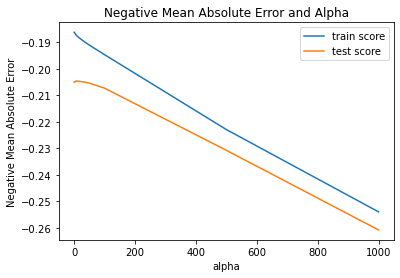

In [64]:
#plot mean test and train scores with alpha

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score','test score'], loc='upper right')
plt.show()

In [68]:
##checking the coefficients values with Alpha =8

ridge = Ridge(alpha=10.0)

ridge.fit(X_train, y_train)
print("Intercept : ", ridge.intercept_)
print("Coefficients :\n", ridge.coef_)

Intercept :  -2.562199349813362e-16
Coefficients :
 [ 0.05655594  0.16568424  0.10504105  0.028174    0.06159816  0.00857919
  0.01162459  0.0821548   0.36846766  0.02540985 -0.03822709  0.06616331
  0.03011695 -0.10795798  0.08176606  0.02227168  0.11208735  0.05746971
 -0.02765682 -0.02971803 -0.04592386 -0.03697487  0.04430957  0.06118063
 -0.03677109 -0.02724147  0.0579115   0.03433482 -0.03420989 -0.04042133
 -0.03720464 -0.05213242  0.06046667 -0.00340189 -0.00340189  0.02817657
 -0.0723107  -0.09584861 -0.04620994 -0.14205416 -0.15345779  0.06481539
  0.03521327 -0.04786221 -0.15757444 -0.17272001  0.02783465  0.22816993
  0.03921185 -0.14807219]


#### Model Prediciton and Evaluation Metrics

In [69]:
#Ridge Regression Model Predicitons

print("For Ridge Regression Model :")
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

#R2 score for Ridge Regression Model

r2_score_train_ridge = r2_score(y_true=y_train, y_pred=y_pred_train_ridge)
r2_score_test_ridge = r2_score(y_true=y_test, y_pred=y_pred_test_ridge)

#MSE(Mean Squared Error) for Ridge Regression Model

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

#Mean Absolute Error for train and test sets

mae_train_ridge = mean_absolute_error(y_train,y_pred_train_ridge)
mae_test_ridge = mean_absolute_error(y_test,y_pred_test_ridge)

#RMSE(Root Mean Squared Error) for train and test sets

RMSE_train_ridge = np.sqrt(mse_train_ridge)
RMSE_test_ridge = np.sqrt(mse_test_ridge)

print("\n For Train Set: \n R2 Score : ",r2_score_train_ridge,"\nMSE Score : ",mse_train_ridge,"\nMAE Score : ",mae_train_ridge,
     "\nRMSE Score : ",RMSE_train_ridge)
print("\n For Test Set: \n R2 Score : ",r2_score_test_ridge,"\nMSE Score : ",mse_test_ridge,"\nMAE Score : ",mae_test_ridge,
     "\nRMSE Score : ",RMSE_test_ridge)

For Ridge Regression Model :

 For Train Set: 
 R2 Score :  0.9266138874502546 
MSE Score :  0.07338611254974538 
MAE Score :  0.18863624424427936 
RMSE Score :  0.2708987127133412

 For Test Set: 
 R2 Score :  0.8745456076819325 
MSE Score :  0.10769637956982141 
MAE Score :  0.21601744299582332 
RMSE Score :  0.32817126560657534


In [70]:
#Creating a dataframe of features and coefficients

df_ridge = pd.DataFrame({'Features':X_train.columns, 'Coefficients':ridge.coef_.round(2), 
                        'Abs_Coefficient_Ridge':abs(ridge.coef_.round(2))})
df_ridge = df_ridge.sort_values(by='Abs_Coefficient_Ridge', ascending=False)
df_ridge.reset_index(drop=True, inplace=True)
df_ridge.head(15)

,Features,Coefficients,Abs_Coefficient_Ridge
0,GrLivArea,0.37,0.37
1,SaleType_New,0.23,0.23
2,OverallQual,0.17,0.17
3,KitchenQual_TA,-0.17,0.17
4,KitchenQual_Gd,-0.16,0.16
5,BsmtQual_TA,-0.15,0.15
6,SaleCondition_Partial,-0.15,0.15
7,BsmtQual_Gd,-0.14,0.14
8,OverallCond,0.11,0.11
9,PropertyAge,-0.11,0.11


- Above are top 15 predictors based on Ridge Regression model, which are significant in predicitng the sale price of the house.

#### Residual Analysis of Ridge Model

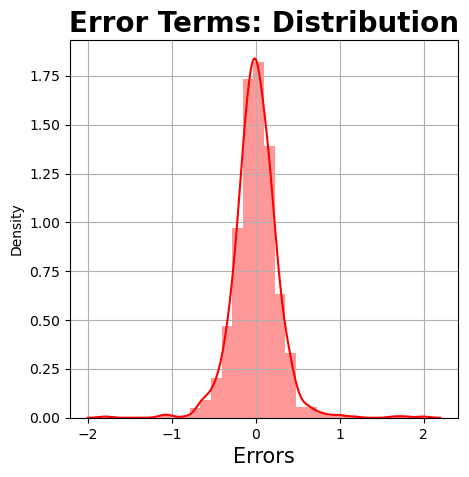

In [71]:
# For Train Set

plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_ridge)
sns.distplot(res, bins=30, color='r')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.grid(True)
plt.show()

- Error terms seems to be normally distributed with centered mean at 0. So our assumption holds true.

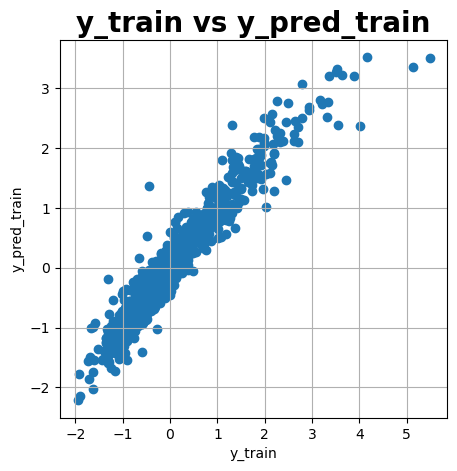

In [72]:
# Plotting y_train and y_pred_train to understand about residuals.
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(y_train,y_pred_train_ridge)
plt.title('y_train vs y_pred_train', fontweight='bold', fontsize=20)
plt.xlabel('y_train', fontsize=10)
plt.ylabel('y_pred_train',fontsize=10)
plt.grid(True)
plt.show()

In [73]:
y_train.shape

(979,)

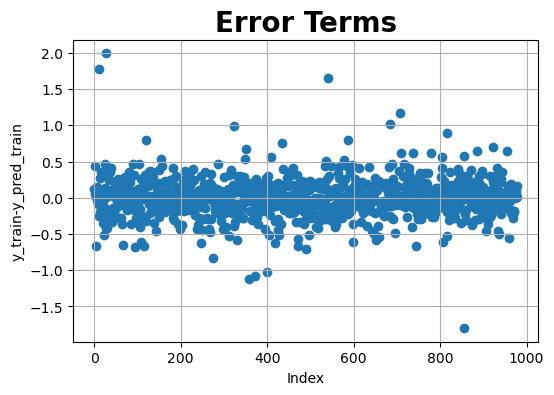

In [74]:


#Error terms for train set

plt.figure(figsize =(6,4),dpi=100)
j = [i for i in range(0,979,1)]
res_train = (y_train-y_pred_train_ridge)
plt.scatter(j, res_train)
plt.title('Error Terms', fontweight='bold', fontsize=20)
plt.xlabel('Index', fontsize=10)
plt.ylabel('y_train-y_pred_train',fontsize=10)
plt.grid(True)
plt.show()

- Residulas are scatterd along y=0 and are independent of each other

##### For Test Set

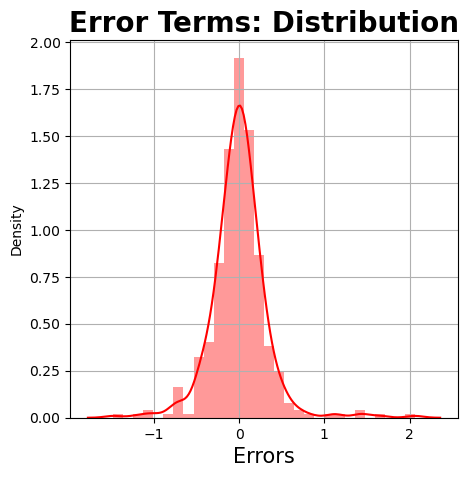

In [75]:
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_ridge)
sns.distplot(res, bins=30, color='r')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.grid(True)
plt.show()

- Error terms seems to be normally distributed with centered mean at 0. So our assumption holds true.

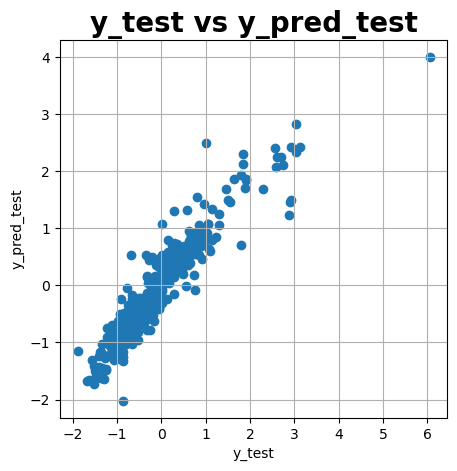

In [76]:
# Plotting y_test and y_pred_test to understand about residuals.
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(y_test,y_pred_test_ridge)
plt.title('y_test vs y_pred_test', fontweight='bold', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test',fontsize=10)
plt.grid(True)
plt.show()

In [77]:
y_test.shape

(420,)

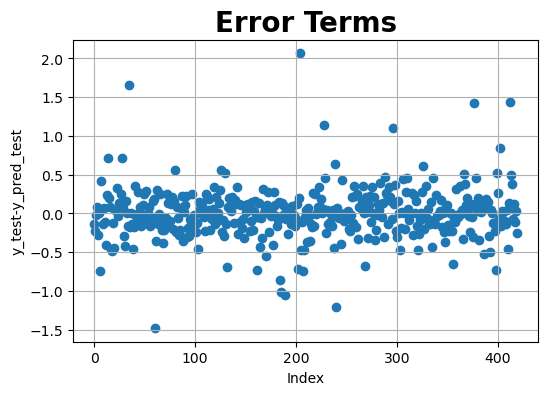

In [78]:
#Error terms for train set

plt.figure(figsize =(6,4),dpi=100)
j = [i for i in range(0,420,1)]
res_test = (y_test-y_pred_test_ridge)
plt.scatter(j, res_test)
plt.title('Error Terms', fontweight='bold', fontsize=20)
plt.xlabel('Index', fontsize=10)
plt.ylabel('y_test-y_pred_test',fontsize=10)
plt.grid(True)
plt.show()

- Residulas are scatterd along y=0 and are independent of each other

#### Lasso Regression Model:

In [79]:
lasso = Lasso()

lasso_params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 
                          0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                          8.0,9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#cross validations
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,
                             param_grid = lasso_params,
                             scoring = 'neg_mean_absolute_error',
                             cv = folds,
                             return_train_score = True,
                             verbose = 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Display Mean Scores

lasso_model_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_model_cv_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by=['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0001,-0.186221,-0.205067,1
2,0.0002,-0.186277,-0.205069,2
0,0.00001,-0.186190,-0.205076,3
3,0.0003,-0.186343,-0.205086,4
4,0.0005,-0.186489,-0.205140,5
5,0.0006,-0.186570,-0.205172,6
6,0.0007,-0.186657,-0.205208,7
10,0.002,-0.188095,-0.205248,8
7,0.0008,-0.186767,-0.205249,9
8,0.0009,-0.186878,-0.205270,10


In [81]:
##checking the coefficients values with Alpha =0.002

lasso = Lasso(alpha=0.0001)

lasso.fit(X_train, y_train)
print("Intercept : ", lasso.intercept_)
print("Coefficients :\n", lasso.coef_)

Intercept :  -2.4012584642981175e-16
Coefficients :
 [ 0.06048368  0.15348952  0.10900697  0.02568435  0.04702353  0.00213591
 -0.          0.09322784  0.38226942  0.0284261  -0.04675872  0.06320498
  0.02726104 -0.11542457  0.12096212  0.03797947  0.18154231  0.11805895
 -0.03014655 -0.03133548 -0.04823957 -0.03785593  0.04509221  0.05659087
 -0.03805717 -0.02771179  0.05671196  0.03487448 -0.0336727  -0.0418343
 -0.03761322 -0.05257888  0.05951039 -0.00743496 -0.          0.02756071
 -0.08228634 -0.10163149 -0.04865254 -0.14784988 -0.15611688  0.06774172
  0.03494696 -0.05626361 -0.17926637 -0.19792416  0.02504325  0.5255104
  0.03688334 -0.44908253]


In [82]:
#Lasso Regression Model Predicitons

print("For Lasso Regression Model :")
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

#R2 score for Lasso Regression Model

r2_score_train_lasso = r2_score(y_true=y_train, y_pred=y_pred_train_lasso)
r2_score_test_lasso = r2_score(y_true=y_test, y_pred=y_pred_test_lasso)

#MSE(Mean Squared Error) for Lasso Regression Model

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

#Mean Absolute Error for train and test sets

mae_train_lasso = mean_absolute_error(y_train,y_pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test,y_pred_test_lasso)

#RMSE(Root Mean Squared Error) for train and test sets

RMSE_train_lasso = np.sqrt(mse_train_lasso)
RMSE_test_lasso = np.sqrt(mse_test_lasso)

print("\n For Train Set: \n R2 Score : ",r2_score_train_lasso,"\nMSE Score : ",mse_train_lasso,"\nMAE Score : ",mae_train_lasso,
     "\nRMSE Score : ",RMSE_train_lasso)
print("\n For Test Set: \n R2 Score : ",r2_score_test_lasso,"\nMSE Score : ",mse_test_lasso,"\nMAE Score : ",mae_test_lasso,
     "\nRMSE Score : ",RMSE_test_lasso)

For Lasso Regression Model :

 For Train Set: 
 R2 Score :  0.9281586398443202 
MSE Score :  0.07184136015567978 
MAE Score :  0.18728204739441068 
RMSE Score :  0.268032386393286

 For Test Set: 
 R2 Score :  0.8558197392779632 
MSE Score :  0.12377160973231258 
MAE Score :  0.22070324322871987 
RMSE Score :  0.351811895382053


In [83]:
#Creating a dataframe of features and coefficients

df_lasso = pd.DataFrame({'Features':X_train.columns, 'Coefficients':lasso.coef_.round(2), 
                        'Abs_Coefficient_Lasso':abs(lasso.coef_.round(2))})
df_lasso = df_lasso.sort_values(by='Abs_Coefficient_Lasso', ascending=False)
df_lasso.reset_index(drop=True, inplace=True)
df_lasso.head(15)

,Features,Coefficients,Abs_Coefficient_Lasso
0,SaleType_New,0.53,0.53
1,SaleCondition_Partial,-0.45,0.45
2,GrLivArea,0.38,0.38
3,KitchenQual_TA,-0.20,0.20
4,MSZoning_RL,0.18,0.18
5,KitchenQual_Gd,-0.18,0.18
6,BsmtQual_TA,-0.16,0.16
7,BsmtQual_Gd,-0.15,0.15
8,OverallQual,0.15,0.15
9,PropertyAge,-0.12,0.12


#### Residual Analysis of Lasso Model

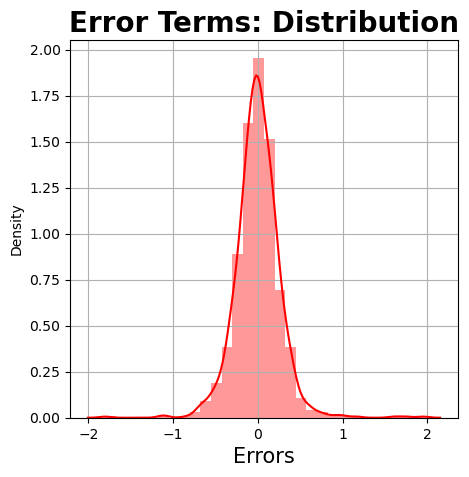

In [84]:
# For Train Set

plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_lasso)
sns.distplot(res, bins=30, color='r')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.grid(True)
plt.show()

- Error terms seems to be normally distributed with centered mean at 0. So our assumption holds true.

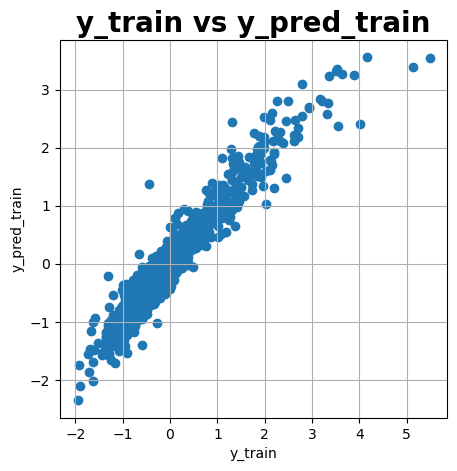

In [85]:
# Plotting y_train and y_pred_train to understand about residuals.
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(y_train,y_pred_train_lasso)
plt.title('y_train vs y_pred_train', fontweight='bold', fontsize=20)
plt.xlabel('y_train', fontsize=10)
plt.ylabel('y_pred_train',fontsize=10)
plt.grid(True)
plt.show()

In [86]:
y_train.shape

(979,)

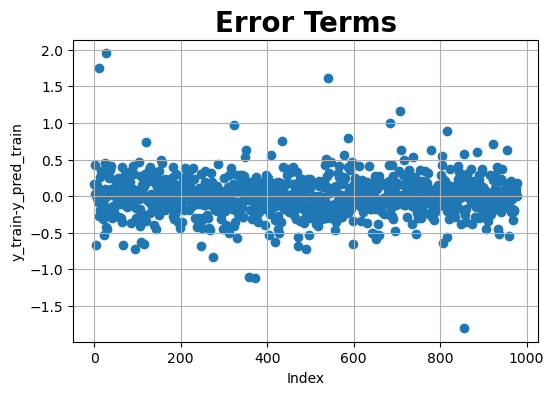

In [87]:
#Error terms for train set

plt.figure(figsize =(6,4),dpi=100)
j = [i for i in range(0,979,1)]
res_train = (y_train-y_pred_train_lasso)
plt.scatter(j, res_train)
plt.title('Error Terms', fontweight='bold', fontsize=20)
plt.xlabel('Index', fontsize=10)
plt.ylabel('y_train-y_pred_train',fontsize=10)
plt.grid(True)
plt.show()

- Residulas are scatterd along y=0 and are independent of each other

##### For Test Set

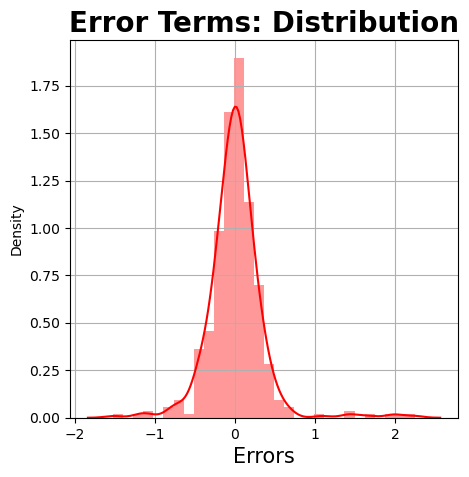

In [88]:
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_lasso)
sns.distplot(res, bins=30, color='r')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.grid(True)
plt.show()

- Error terms seems to be normally distributed with centered mean at 0. So our assumption holds true.

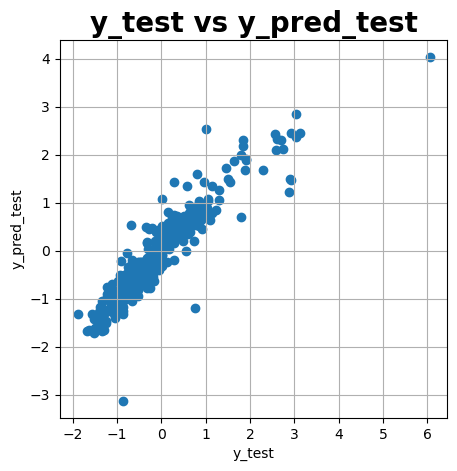

In [89]:
# Plotting y_test and y_pred_test to understand about residuals.
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(y_test,y_pred_test_lasso)
plt.title('y_test vs y_pred_test', fontweight='bold', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred_test',fontsize=10)
plt.grid(True)
plt.show()

In [90]:
y_test.shape

(420,)

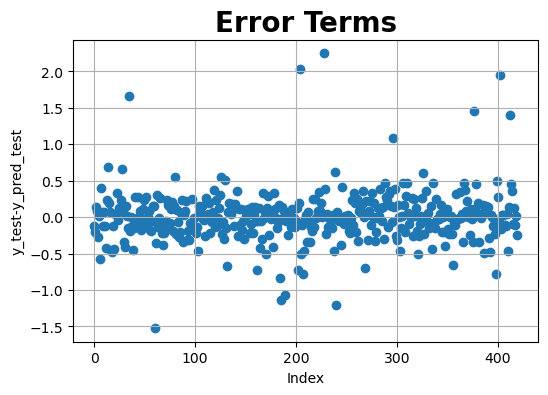

In [91]:
#Error terms for test set

plt.figure(figsize =(6,4),dpi=100)
j = [i for i in range(0,420,1)]
res_test = (y_test-y_pred_test_lasso)
plt.scatter(j, res_test)
plt.title('Error Terms', fontweight='bold', fontsize=20)
plt.xlabel('Index', fontsize=10)
plt.ylabel('y_test-y_pred_test',fontsize=10)
plt.grid(True)
plt.show()

- Residulas are scatterd along y=0 and are independent of each other

#### Observations:

- Though the Model performance by Ridge Regression was slightly better in terms of R2 Value of Train and Test sets, it is better to use Lasso, since it brings and assigns a Zero value to insignificant features, enabling us to easily choose predicitve feature variables.
- It is always advisable to use simple yet robust model.


### Top 15 feature by Lasso Regression

In [92]:
df_lasso.head(15)

,Features,Coefficients,Abs_Coefficient_Lasso
0,SaleType_New,0.53,0.53
1,SaleCondition_Partial,-0.45,0.45
2,GrLivArea,0.38,0.38
3,KitchenQual_TA,-0.20,0.20
4,MSZoning_RL,0.18,0.18
5,KitchenQual_Gd,-0.18,0.18
6,BsmtQual_TA,-0.16,0.16
7,BsmtQual_Gd,-0.15,0.15
8,OverallQual,0.15,0.15
9,PropertyAge,-0.12,0.12


### Equation:
- y = c + (0.53)*SaleType_New - (0.45)*SaleCondition_Partial + (0.38)*GrLivArea - (0.20)*KitchenQual_TA  + (0.18)*MSZoning_RL   - (0.18)*KitchenQual_Gd - (0.16)*BsmtQual_TA - (0.15)*BsmtQual_Gd + (0.15)*OverallQual	- (0.12) * PropertyAge+ (0.12)* MSZoning_FV+ (0.12)* MSZoning_RM+(0.11)*OverallCond -(0.10)*ExterQual_TA+ (0.09)*TotalBsmtSF  

##### Inference

- The highest value of positive coefficients suggest a high sale value (SaleType_new, GrLivArea, MSZoning_RL etc...)
- The higher value of negative coefficients suggest a decrease in sale value(SaleCondition_Partial,KitchenQual_TA etc...)